###**Análise de Comportamento de Extrovertidos vs. Introvertidos**

**Alunos:** Bianca Guimarães, Gislany Araujo, José Lucas Eloi, João Gabriel, João Marcos Tavares, Pedro Ayres, Reideclildon Paulo, Thaise Renaux.

**Dataset:** Extrovert vs. Introvert Behavior Data ([Link Kaggle](https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data))

Utilizando o conjunto de dados "Extrovert vs. Introvert Behavior Data", que classifica indivíduos e registra alguns de seus hábitos, buscamos responder à seguinte pergunta: **Existem diferenças nos hábitos digitais e de lazer que possam ser associadas a traços de personalidade como extroversão e introversão?**

Para guiar nossa análise, levantamos as seguintes hipóteses:

**Hipótese 1:** Indivíduos classificados como extrovertidos tendem a passar mais horas em redes sociais em comparação com os introvertidos.

**Hipótese 2:** Pessoas introvertidas tendem a ter medo de palco.

**Hipótese 3:** Pessoas introvertidas tendem a passar mais tempo dentro de casa.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12



In [ ]:
try:
  df = pd.read_csv('personality_datasert.csv')
  print("Dataset carregado com sucesso!")
  print("Amostra dos dados:")
  display(df.head())
except FileNotFoundError:
  print("Erro: Arquivo não encontrado. Por favor, faça o upload do seu CSV e verifique o nome do arquivo.")

if 'df' in locals():
    print("\nInformações gerais do DataFrame:")
    df.info()
    print("\nVerificação de dados faltantes:")
    print(df.isnull().sum())

Dataset carregado com sucesso!
Amostra dos dados:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert



Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB

Verificação de dados faltantes:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency             

##**Metodologia**

**Análise Exploratória:** Para cada hipótese, foram geradas estatísticas descritivas (média, mediana, desvio padrão) e visualizações gráficas (boxplots) para comparar as distribuições das variáveis de interesse (`Horas nas redes sociais` e `Nº de Hobbies`) entre os dois grupos.

**Teste de Hipóteses:** Para determinar se as diferenças observadas entre os grupos eram estatisticamente significativas, foi adotado o seguinte procedimento:

**Teste de Normalidade:** O teste de **Shapiro-Wilk** foi aplicado a cada grupo para verificar se os dados seguem uma distribuição normal.
**Escolha do Teste de Comparação:**
* Se ambas as amostras de um grupo fossem normais (p > 0.05), seria utilizado o **Teste T de Student** para amostras independentes.
* Caso contrário, seria utilizado o teste não-paramétrico de **Mann-Whitney U**.
* **Nível de Significância:** Foi adotado um nível de significância (alpha) de 0.05. Um p-valor abaixo de 0.05 indica que a diferença entre os grupos é estatisticamente significativa.

##**Pré-processamento Básico - (Limpeza)**
Antes de visualizar, converter colunas de texto que representam categorias em números, pois a maioria dos algoritmos e funções de visualização trabalha melhor com eles.

Converter colunas 'Sim'/'Não': As colunas Stage_fear e Drained_after_socializing são perfeitas para isso. Podemos mapear 'Yes' para 1 e 'No' para 0.

Converter a coluna alvo 'Personality': Da mesma forma, vamos mapear 'Extrovert' para 1 e 'Introvert' para 0.

In [ ]:
# Mapeando as colunas binárias para 0 e 1
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# Mapeando a coluna ("Extrovert" & "Introvert") para 0 e 1
df['Personality'] = df['Personality'].map({'Extrovert': 1, 'Introvert': 0})

# Exibir - (Confirmar a mudanças)
print("Dados após a conversão:")
df.head()

Dados após a conversão:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


##**Nossa Abordagem de Análise**

Para explorar os dados, dividimos nossa análise em duas etapas principais:

**1. Análise Univariada:**
  
**O que fizemos?** Analisamos cada característica do nosso dataset de forma isolada.
**Por quê?** Para entender as informações básicas de cada uma, como a proporção de introvertidos e extrovertidos.

**2. Análise Bivariada (Procurando conexões):**
**O que fizemos?** Cruzamos a variável 'Personalidade' com as outras características do dataset.
**Por quê?** Para encontrar relações entre elas e testar nossas hipóteses. Por exemplo, verificamos se o tempo gasto em redes sociais era diferente entre introvertidos e extrovertidos.

##**Análise Univariada**


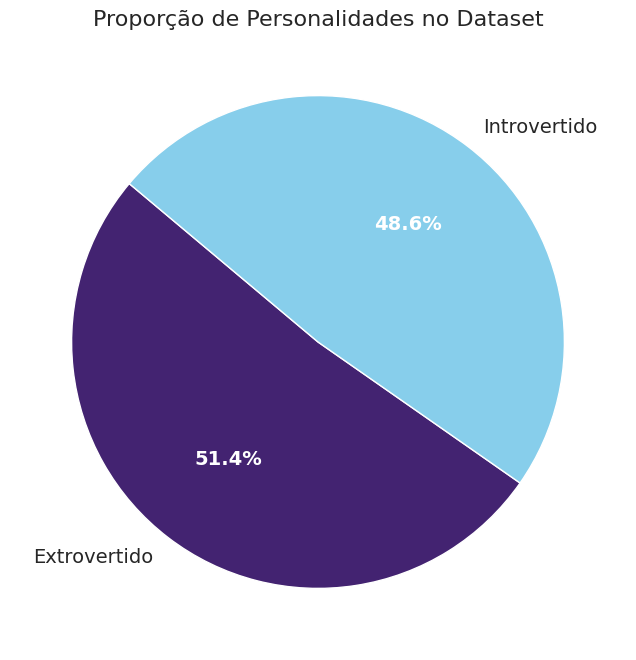

In [ ]:
# --- Gráfico de Pizza ---
import matplotlib.pyplot as plt

personality_counts = df['Personality'].value_counts()
labels = ['Extrovertido', 'Introvertido'] if personality_counts.index[0] == 1 else ['Introvertido', 'Extrovertido']
cores = ['#432371', 'skyblue'] if personality_counts.index[0] == 1 else ['skyblue', '#432371']


plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    personality_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=cores,
    textprops={'fontsize': 14}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Proporção de Personalidades no Dataset', fontsize=16)
plt.ylabel('')
plt.show()

Histogramas são ótimos para ver a forma, a centralidade e a dispersão de variáveis como "Time_spent_Alone" ou "Friends_circle_size".

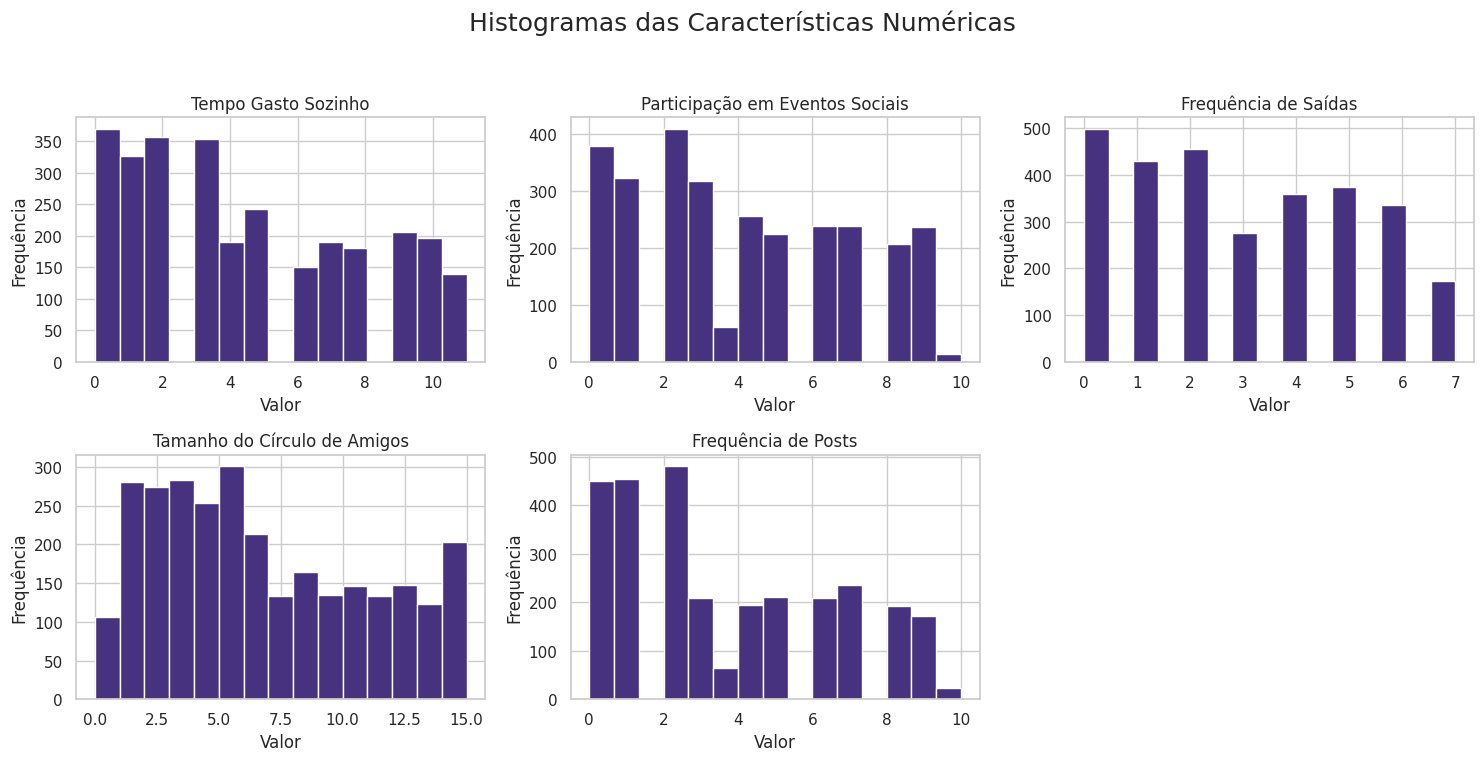

In [ ]:
# --- Histograma ---
import matplotlib.pyplot as plt

# Traduções
traducoes = {
    'Time_spent_Alone': 'Tempo Gasto Sozinho',
    'Stage_fear': 'Medo de Palco',
    'Social_event_attendance': 'Participação em Eventos Sociais',
    'Going_outside': 'Frequência de Saídas',
    'Drained_after_socializing': 'Esgotado Após Socializar',
    'Friends_circle_size': 'Tamanho do Círculo de Amigos',
    'Post_frequency': 'Frequência de Posts',
    'Personality': 'Personalidade'
}

colunas_numericas = [
    'Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
    'Friends_circle_size', 'Post_frequency'
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, coluna in enumerate(colunas_numericas):
    ax = axes[i]
    ax.hist(df[coluna], bins=15)
    ax.set_title(traducoes[coluna], fontsize=12)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequência')

for i in range(len(colunas_numericas), len(axes)):
    axes[i].axis('off')

fig.suptitle('Histogramas das Características Numéricas', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##**Análise Bivariada**


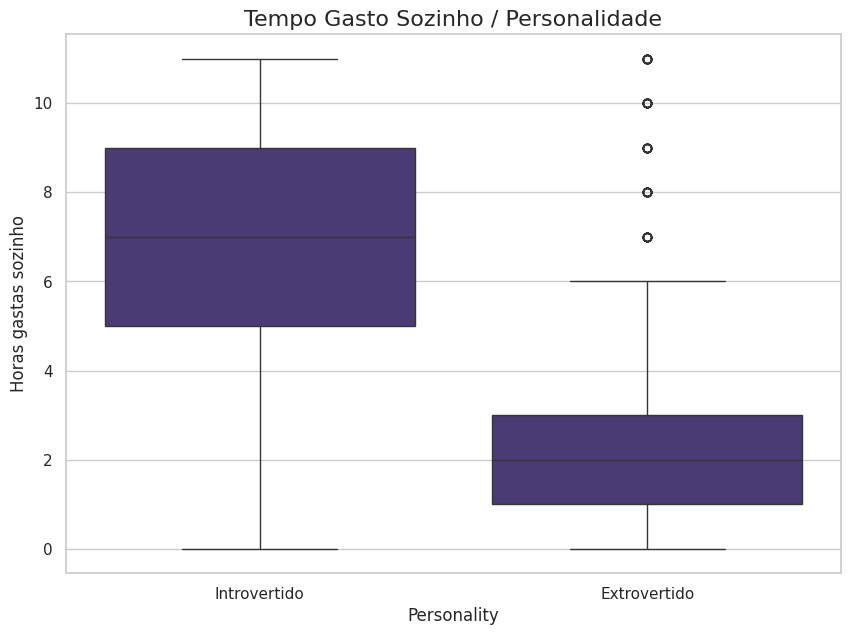

In [ ]:
# --- Boxplot ---
plt.figure(figsize=(10, 7))
sns.boxplot(x='Personality', y='Time_spent_Alone', data=df)
plt.title('Tempo Gasto Sozinho / Personalidade', fontsize=16)
plt.xticks([0, 1], ['Introvertido', 'Extrovertido'])
plt.ylabel('Horas gastas sozinho')
plt.show()

##**Medo de Palco vs. Personalidade: Existe uma relação?**

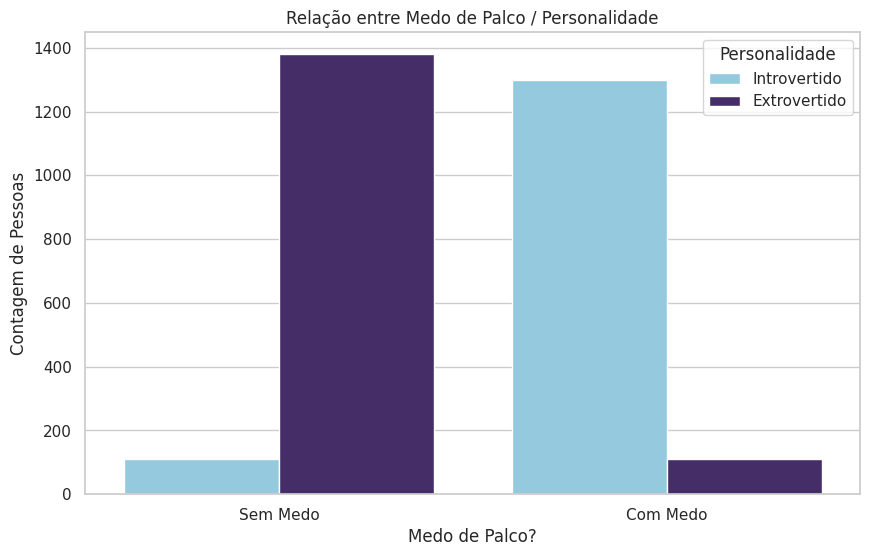

In [ ]:
# --- Gráfico de Barras ---
import seaborn as sns
import matplotlib.pyplot as plt

cores_ordenadas = ['skyblue', '#432371']
sns.countplot(x='Stage_fear', hue='Personality', data=df, palette=cores_ordenadas)

plt.title('Relação entre Medo de Palco / Personalidade')
plt.xlabel('Medo de Palco?', fontsize=12)
plt.ylabel('Contagem de Pessoas', fontsize=12)
plt.xticks([0, 1], ['Sem Medo', 'Com Medo'])
plt.legend(title='Personalidade', labels=['Introvertido', 'Extrovertido'])
plt.show()

##**Será que pessoas com mais amigos tendem a ir a mais eventos sociais?**

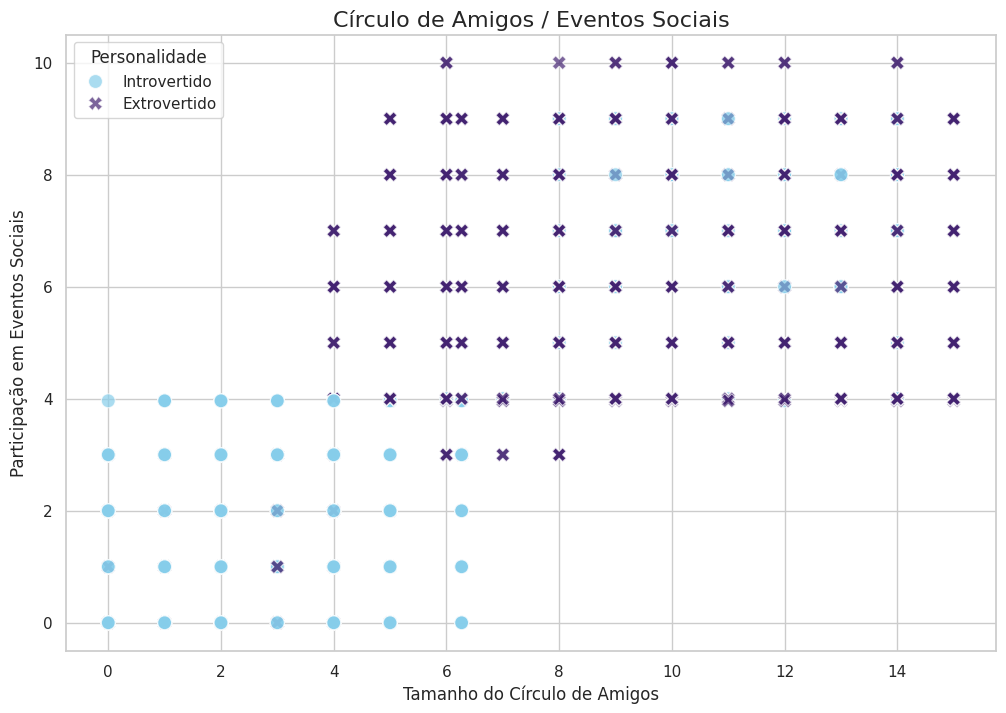

In [ ]:
# --- Gráfico de Dispersão ---
import seaborn as sns
import matplotlib.pyplot as plt

cores_personalizadas = {0: 'skyblue', 1: '#432371'}

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Friends_circle_size',
    y='Social_event_attendance',
    hue='Personality',
    palette=cores_personalizadas,
    style='Personality',
    s=100,
    alpha=0.7
)

plt.title('Círculo de Amigos / Eventos Sociais', fontsize=16)
plt.xlabel('Tamanho do Círculo de Amigos', fontsize=12)
plt.ylabel('Participação em Eventos Sociais', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Introvertido', 'Extrovertido'], title='Personalidade')

plt.grid(True)
plt.show()

##**Será que extrovertidos postam com mais frequência nas redes sociais?**


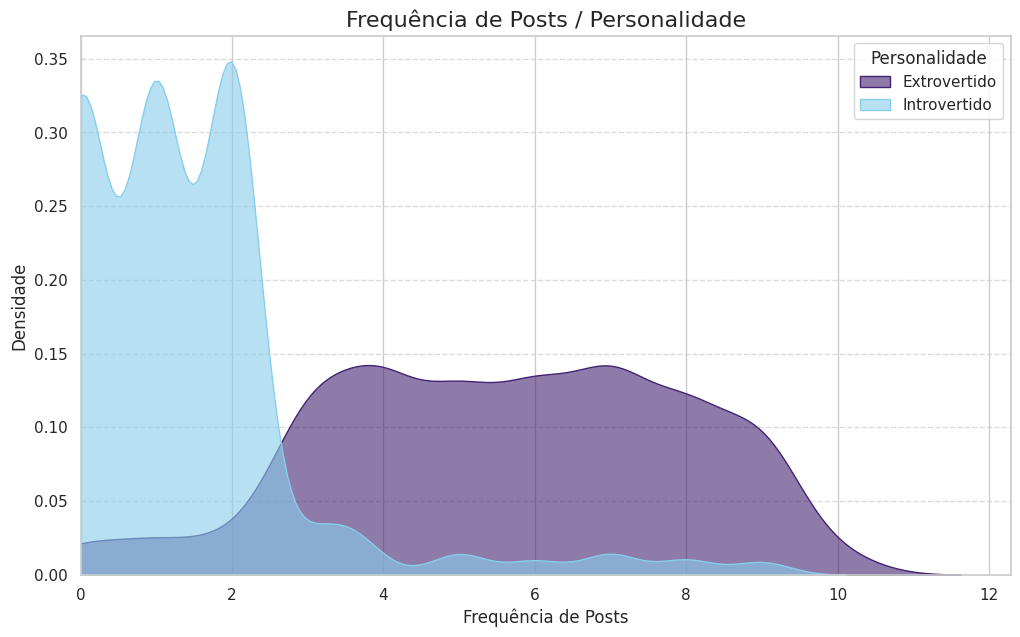

In [ ]:
# --- Gráfico de Densidade ---
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df['Personality'] = pd.to_numeric(df['Personality'])

plt.figure(figsize=(12, 7))

sns.kdeplot(
    df[df['Personality'] == 1]['Post_frequency'],
    label='Extrovertido',
    color='#432371',
    fill=True,
    alpha=0.6
)

sns.kdeplot(
    df[df['Personality'] == 0]['Post_frequency'],
    label='Introvertido',
    color='skyblue',
    fill=True,
    alpha=0.6
)

plt.title('Frequência de Posts / Personalidade', fontsize=16)
plt.xlabel('Frequência de Posts', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend(title='Personalidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(left=0)
plt.show()

##**A Hipótese que estamos testando é:**

Hipótese Nula (H
0
​
 ): A média de frequência de posts é a mesma para introvertidos e extrovertidos. (Qualquer diferença que vemos nos gráficos é apenas por acaso).

Hipótese Alternativa (H
a
​
 ): A média de frequência de posts é diferente entre os dois grupos.


# **Teste T**

O Teste T vai nos dar um p-valor, que nos ajudará a decidir qual dessas hipóteses é mais provável.

**Interpretação dos Resultados:**

* **Estatística do Teste (t-statistic):** Este número indica o quão grande é a diferença entre as médias dos dois grupos. Um valor positivo aqui significa que a média do primeiro grupo (extrovert_posts) é maior que a do segundo.

* **P-valor (p-value):** Esta é a métrica mais importante. Ele representa a probabilidade de você observar a diferença que viu nos seus dados (ou uma diferença ainda maior) por puro acaso, se a Hipótese Nula fosse verdadeira.

* **Um p-valor baixo (menor que 0.05) é a nossa meta. Ele nos diz:** "É muito improvável que essa diferença seja aleatória". Portanto, podemos concluir que a diferença é "real" (estatisticamente significativa).

* **Um p-valor alto (maior que 0.05) nos diz:** "É bastante provável que essa diferença seja apenas uma variação aleatória". Portanto, não temos evidências para dizer que há uma diferença real.

In [ ]:
# --- Teste T para Frequência de Posts ---
from scipy import stats
import pandas as pd

df['Personality'] = pd.to_numeric(df['Personality'])

introvert_posts = df[df['Personality'] == 0]['Post_frequency']
extrovert_posts = df[df['Personality'] == 1]['Post_frequency']

t_statistic, p_value = stats.ttest_ind(extrovert_posts, introvert_posts, equal_var=False)

print("--- Resultado do Teste T para Frequência de Posts ---")
print(f"Estatística do Teste (t-statistic): {t_statistic:.4f}")
print(f"P-valor (p-value): {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("\nConclusão: O P-valor é menor que 0.05.")
    print("Isso significa que rejeitamos a hipótese nula. Há uma diferença ESTATISTICAMENTE SIGNIFICATIVA na frequência de posts entre introvertidos e extrovertidos.")
else:
    print("\nConclusão: O P-valor é maior que 0.05.")
    print("Isso significa que não podemos rejeitar a hipótese nula. Não há evidências estatísticas fortes para afirmar que existe uma diferença na frequência de posts entre os grupos.")

--- Resultado do Teste T para Frequência de Posts ---
Estatística do Teste (t-statistic): 56.6141
P-valor (p-value): 0.0000

Conclusão: O P-valor é menor que 0.05.
Isso significa que rejeitamos a hipótese nula. Há uma diferença ESTATISTICAMENTE SIGNIFICATIVA na frequência de posts entre introvertidos e extrovertidos.


##**A Hipótese que estamos testando é:**

* Hipótese Nula (H
0
​
 ): Não há associação entre o tipo de personalidade e ter medo de palco. As duas variáveis são independentes.

* Hipótese Alternativa (H
a
​
 ): Existe uma associação entre o tipo de personalidade e ter medo de palco.

##**Teste Qui-Quadrado (Chi-Squared) para investigar a relação entre a personalidade e o medo de palco.**

Este teste é ideal para variáveis categóricas ("Sim"/"Não", "Introvertido"/"Extrovertido"). Ele vai analisar a tabela de contagem que vimos no gráfico de barras e nos dizer se a distribuição observada é estatisticamente diferente do que esperaríamos por puro acaso.

###**Interpretação dos Resultados:**

* **Tabela de Contingência:** A primeira saída do código. Ela é a base do teste e te dá uma visão clara dos números brutos. Você pode ver exatamente quantos introvertidos têm medo de palco em comparação com os extrovertidos.

* **Estatística do Qui-Quadrado:** Mede a discrepância entre os seus dados observados (a tabela acima) e os dados que seriam esperados se não houvesse nenhuma relação entre as variáveis. Quanto maior o valor, maior a diferença.

* **P-valor (p-value):** Assim como no Teste T, esta é a métrica decisiva.
Se for menor que 0.05, você tem uma forte evidência para dizer que a relação que você viu nos gráficos não é aleatória. Existe de fato uma associação entre ser introvertido/extrovertido e a tendência a ter medo de palco.

In [ ]:
# --- Teste Qui-Quadrado para Medo de Palco ---
import pandas as pd
from scipy.stats import chi2_contingency

df['Personality'] = pd.to_numeric(df['Personality'])
df['Stage_fear'] = pd.to_numeric(df['Stage_fear'])

contingency_table = pd.crosstab(df['Personality'], df['Stage_fear'])
contingency_table.index = ['Introvertido (0)', 'Extrovertido (1)']
contingency_table.columns = ['Sem Medo (0)', 'Com Medo (1)']

print("--- Tabela de Contingência ---")
print("Mostra a contagem real de pessoas em cada cruzamento:")
print(contingency_table)
print("\n" + "="*40 + "\n")

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("--- Resultado do Teste Qui-Quadrado ---")
print(f"Estatística do Qui-Quadrado: {chi2:.4f}")
print(f"P-valor (p-value): {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("\nConclusão: O P-valor é menor que 0.05.")
    print("Rejeitamos a hipótese nula. Há uma associação ESTATISTICAMENTE SIGNIFICATIVA entre o tipo de personalidade e ter medo de palco.")
else:
    print("\nConclusão: O P-valor é maior que 0.05.")
    print("Não rejeitamos a hipótese nula. Não há evidência de uma associação estatisticamente significativa entre as variáveis.")

--- Tabela de Contingência ---
Mostra a contagem real de pessoas em cada cruzamento:
                  Sem Medo (0)  Com Medo (1)
Introvertido (0)           110          1299
Extrovertido (1)          1380           111


--- Resultado do Teste Qui-Quadrado ---
Estatística do Qui-Quadrado: 2079.3919
P-valor (p-value): 0.0000

Conclusão: O P-valor é menor que 0.05.
Rejeitamos a hipótese nula. Há uma associação ESTATISTICAMENTE SIGNIFICATIVA entre o tipo de personalidade e ter medo de palco.


###**A hipótese aqui não é sobre a diferença entre grupos, mas sim sobre a relação entre as duas variáveis. Uma hipótese lógica seria:**

* Hipótese (H
a
​
 ): Existe uma correlação positiva e significativa entre o tamanho do círculo de amigos e a frequência de participação em eventos sociais. (Em outras palavras: "quanto mais amigos uma pessoa tem, mais ela tende a ir a eventos sociais").

* Hipótese Nula (H
0
​
 ): Não existe correlação entre as duas variáveis. (O tamanho do círculo de amigos não tem relação com a frequência em eventos).

###**Teste de Correlação de Spearman**

Ele mede a força e a direção da relação entre duas variáveis numéricas. Ele verifica se, à medida que uma variável aumenta, a outra também tende a aumentar (correlação positiva) ou a diminuir (correlação negativa).

Para as variáveis "Tamanho do Círculo de Amigos" (Friends_circle_size) e "Participação em Eventos Sociais" (Social_event_attendance), que são ambas numéricas, a abordagem é um pouco diferente do que fizemos antes.

* **Como Funciona o Resultado do Teste:**
Ele te dará dois valores principais:

* **Coeficiente de Correlação (rho):** Um número entre -1 e 1.

* **Próximo de 1:** Correlação positiva forte (sua hipótese é confirmada).

* **Próximo de -1:** Correlação negativa forte (à medida que um aumenta, o outro diminui).

* **Próximo de 0:** Correlação fraca ou inexistente (hipótese nula é mais provável).

* **P-valor (p-value):** Assim como nos outros testes, ele nos diz se a correlação encontrada é estatisticamente significativa. Se p-valor < 0.05, podemos afirmar com confiança que a correlação não é uma coincidência.


In [ ]:
# --- Teste de Correlação de Spearman ---
import pandas as pd
from scipy.stats import spearmanr

var_amigos = df['Friends_circle_size']
var_eventos = df['Social_event_attendance']

correlation, p_value = spearmanr(var_amigos, var_eventos)

print("--- Resultado do Teste de Correlação de Spearman ---")
print("Hipótese: Existe uma correlação entre 'Tamanho do Círculo de Amigos' e 'Participação em Eventos Sociais'")
print(f"\nCoeficiente de Correlação (rho): {correlation:.4f}")
print(f"P-valor (p-value): {p_value:.4f}")

alpha = 0.05
print("\n--- Interpretação ---")
if p_value < alpha:
    print("Conclusão: O P-valor é menor que 0.05, portanto a correlação é ESTATISTICAMENTE SIGNIFICATIVA.")
    if correlation > 0:
        print(f"O coeficiente positivo ({correlation:.2f}) indica que, à medida que o círculo de amigos aumenta, a participação em eventos sociais também tende a aumentar.")
    else:
        print(f"O coeficiente negativo ({correlation:.2f}) indica que, à medida que o círculo de amigos aumenta, a participação em eventos sociais tende a diminuir.")
else:
    print("Conclusão: O P-valor é maior que 0.05, portanto NÃO HÁ EVIDÊNCIA de uma correlação estatisticamente significativa entre as duas variáveis.")

--- Resultado do Teste de Correlação de Spearman ---
Hipótese: Existe uma correlação entre 'Tamanho do Círculo de Amigos' e 'Participação em Eventos Sociais'

Coeficiente de Correlação (rho): 0.7516
P-valor (p-value): 0.0000

--- Interpretação ---
Conclusão: O P-valor é menor que 0.05, portanto a correlação é ESTATISTICAMENTE SIGNIFICATIVA.
O coeficiente positivo (0.75) indica que, à medida que o círculo de amigos aumenta, a participação em eventos sociais também tende a aumentar.


###**Conclusão**

Este estudo confirmou que existem diferenças claras nos hábitos digitais e de lazer entre extrovertidos e introvertidos.

A análise dos dados mostrou que extrovertidos tendem a ser mais sociáveis, com mais amigos, maior frequência em eventos e mais postagens. Em contrapartida, introvertidos preferem passar mais tempo sozinhos e relatam mais medo de palco e esgotamento social.

Essas observações foram validadas por testes estatísticos (Teste T, Qui-Quadrado e Correlação de Spearman), que comprovaram que as diferenças encontradas são estatisticamente significativas e não obras do acaso.